# Predicting Wine Quality

## Individual Part (70 minutes)

The goal of this project is to develop a classifier that predicts the quality of a wine, using properties of the wine such as 
- type (red or white)
- fixed acidity 
- residual sugar 
- free sulfur dioxide 
- pH
- alcohol 

The quality of the wine is a binary variable, with 1 indicating that the wine is of high quality and 0 indicating otherwise. 

In this part, you will work only with the training data, fitting various models as directed. The training data can be found in `/data/wines/train.csv`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("/data/wines/train.csv")

In [3]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.3,0.18,0.24,3.40,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,1.0
1,white,6.8,0.14,0.18,1.40,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,1.0
2,white,7.3,0.22,0.50,13.70,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,1.0
3,white,7.6,0.67,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,0.0
4,white,7.3,0.21,0.29,1.60,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,1.0
5,white,7.0,0.12,0.19,4.90,0.055,27.0,127.0,0.99530,3.29,0.41,9.4,0.0
6,white,6.8,0.16,0.18,1.80,0.046,31.0,114.0,0.99226,3.27,0.55,10.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,white,6.2,0.26,0.19,3.40,0.049,47.0,172.0,0.99240,3.14,0.43,10.4,1.0
3994,white,7.6,0.30,0.27,10.60,0.039,31.0,119.0,0.99815,3.27,0.30,9.3,1.0


## Question 1 (20 points)

Fit a $k$-nearest neighbors model to this data. Use cross-validation to determine the optimal value of $k$ and to estimate the test accuracy of your classifier. Please print these values. (You may find it helpful to plot the test error curve as a function of $k$, but this is not required.)

**Note:** With $k$-nearest neighbors, it is customary to first standardize all the variables to put them on the same scale. You can use the `scale()` function from `sklearn.preprocessing` for this purpose.

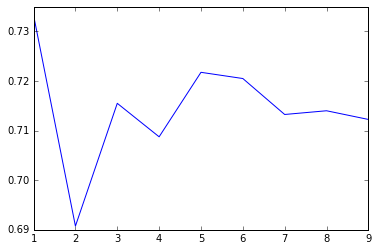

In [4]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

model = KNeighborsClassifier(n_neighbors = 1)

data_sub = pd.DataFrame({
        'fixed acidity': data['fixed acidity'], 'residual sugar': data['residual sugar'],
        'free sulfur dioxide':data['free sulfur dioxide'], 'pH':data['pH'], 'alcohol':data['alcohol']
    }).dropna()


data_sub_scaled = pd.DataFrame(preprocessing.scale(data_sub ,axis = 0))
data_sub_scaled = pd.concat( [data_sub_scaled, pd.get_dummies(data['type']) ], axis = 1)


data_sub_scaled.columns = ['alcohol', 'fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'red', 'white']


X = data_sub_scaled[['alcohol','fixed acidity', 'free sulfur dioxide', 'pH', 'residual sugar', 'red', 'white']]
y = data['quality']

model.fit(X,y)

#test accuracy = 1 - test error
test_accuracies = []

for k in range(1,10):
    
    model = KNeighborsClassifier(k)
    test_accuracies.append(1- np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "mean_squared_error"))) #test error
    
plt.plot(range(1,10), test_accuracies)

#optimal k = 1 neighbor because if k gets any higher than that, test accuracy goes down, which is bad because we want classifier
#to be as accurate as possible. IF this was test-error, choosing k where lowest test error is would be optimal.

## Question 2a (20 points)

Let's model the log-odds of a high quality wine as a polynomial in the alcohol content. In other words:
$$ \log\left(\frac{P(Y=1)}{P(Y=0)}\right) = \beta_0 + \beta_1 X + ... + \beta_p X^p. $$

Try different values of $p$ and estimate the (test) accuracy, precision, and recall. Make a plot showing these three curves (as a function of $p$). Which $p$ is best?

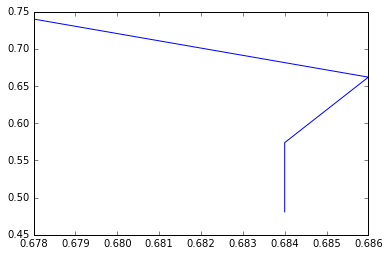

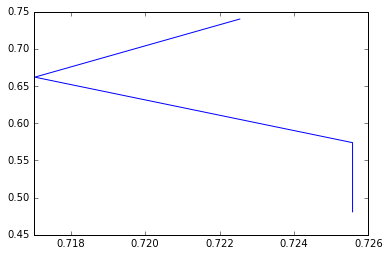

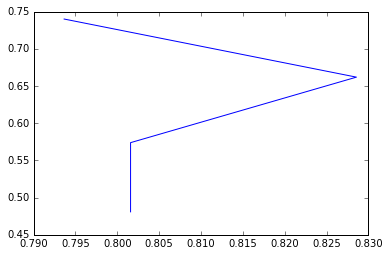

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
model = LogisticRegression()

X = data[['alcohol']]
y = data['quality']

model.fit(X,y)

quality_probabilities = model.predict_proba(pd.DataFrame( [9.5,10,10.5,11 ]))
quality_probabilities_df = pd.DataFrame(quality_probabilities)

test_accuracy = cross_val_score(model,X,y, cv=4, scoring ="accuracy")
precision = cross_val_score(model,X,y, cv=4, scoring ="precision")
recall = cross_val_score(model,X,y, cv=4, scoring ="recall")

plt.figure(1)
plt.plot(test_accuracy, quality_probabilities_df[1])

plt.figure(2)
plt.plot(precision, quality_probabilities_df[1])

plt.figure(3)
plt.plot(recall, quality_probabilities_df[1])

#just realized I used the wrong p. I was thinking of probabilites for this problem.


## Question 2b (5 points)

Make a scatterplot showing alcohol content on the $x$-axis and quality on the $y$-axis. Add your fitted logistic regression model as a line to this plot.

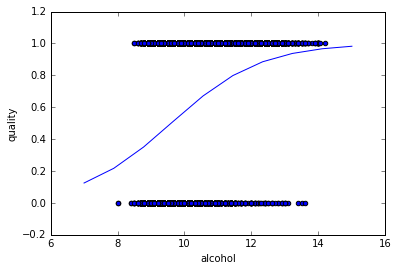

In [6]:


data.plot.scatter(x="alcohol", y="quality")

x_test = np.linspace(7,15, 10)
X_test = pd.DataFrame(x_test)
y_test = model.predict(X_test)
probs = model.predict_proba(X_test)

plt.plot(X_test,probs[:,1])

## Submitting this Project

When you are done, please submit this project by opening up the Terminal and typing the following command at the command line:

`nbgrader submit Project-05-31-Individual --course dlsun`